In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

# Importing
### Cleaning, and Dealing with Missing Values

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Text(0, 0.5, 'Count')

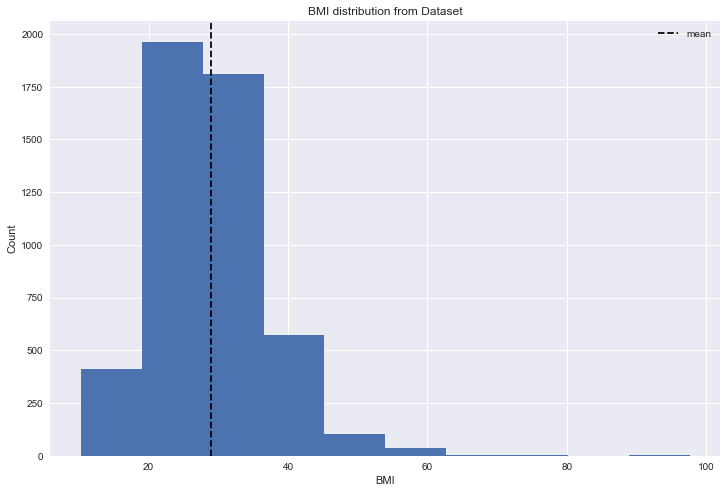

In [5]:
plt.figure(figsize=(12,8))
plt.hist(df['bmi'].dropna())
plt.axvline(df['bmi'].mean(),linestyle='--', color='k', label='mean')
plt.legend()
plt.title('BMI distribution from Dataset', fontsize=12)
plt.xlabel('BMI')
plt.ylabel('Count')

The mean appears to be centered around 30 - we will use the mean to fill the missing BMI values

In [6]:
df['bmi'] = df['bmi'].fillna(df.bmi.mean())

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

It appears we have quite a few 'unknown' status smokers. This could be an important factor

In [10]:
df.replace(to_replace={'Unknown':np.nan}, inplace=True)

In [11]:
df.smoking_status.fillna(method='bfill', inplace=True)
df.smoking_status.fillna(method='ffill', inplace=True)

# EDA

In [12]:
df[df.age == df.age.min()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,smokes,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,never smoked,0


In [13]:
df[df.work_type == 'children']['stroke'].value_counts()

0    685
1      2
Name: stroke, dtype: int64

In [14]:
df.bmi.min()

10.3

Might be good to keep in mind it appears we have infants and young children in the dataset as well. Only two of them out of the entire dataset have had strokes.

In [15]:
len(df)

5110

In [16]:
print("Children make up {}% of the dataset".format(round(df.work_type.value_counts()[2] / len(df) * 100, 2)))

Children make up 13.44% of the dataset


We may want to drop children out of the dataset later. They may not be good predictors of strokes, and may oversaturate the non-stroke patient portion of the data, leading to imbalance.

Let's check out a few things by category

## By Gender:

In [17]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [18]:
df.drop(index=3116, inplace=True)

In [19]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [20]:
by_gender_sum = df.groupby('gender').sum()
by_gender_mean = df.groupby('gender').mean()

<AxesSubplot:xlabel='gender'>

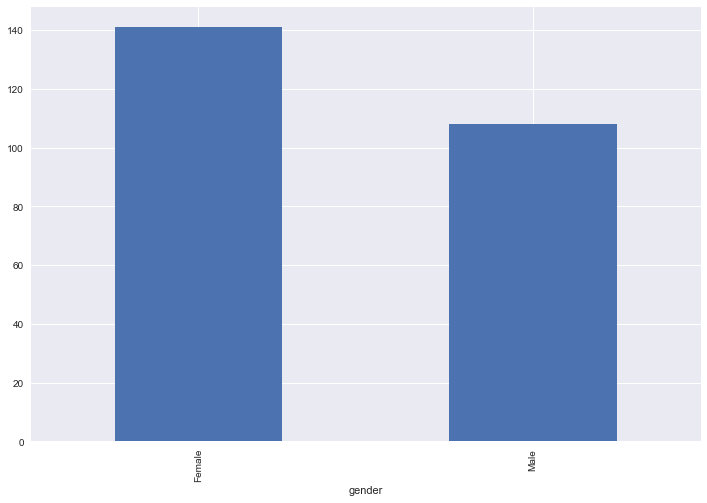

In [21]:
by_gender_sum.stroke.plot(kind='bar', figsize=(12,8))

Text(0, 0.5, 'Hypertension Count')

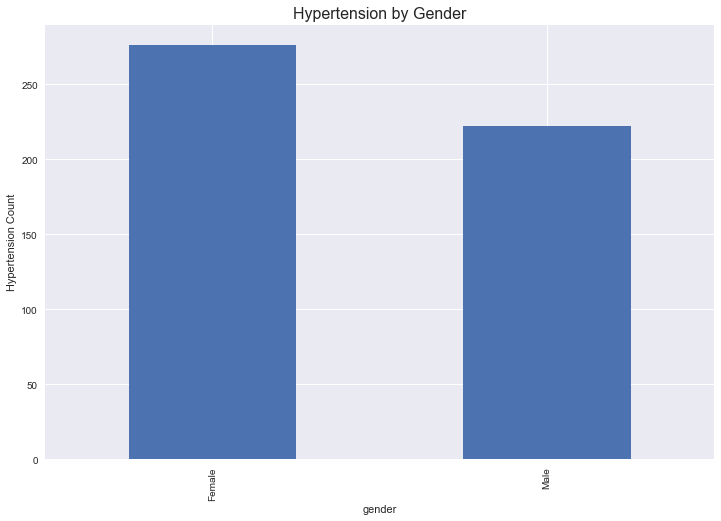

In [22]:
by_gender_sum.hypertension.plot(kind='bar', figsize=(12,8))
plt.title('Hypertension by Gender', fontsize=16)
plt.ylabel('Hypertension Count')

Text(0, 0.5, 'Heart Disease Count')

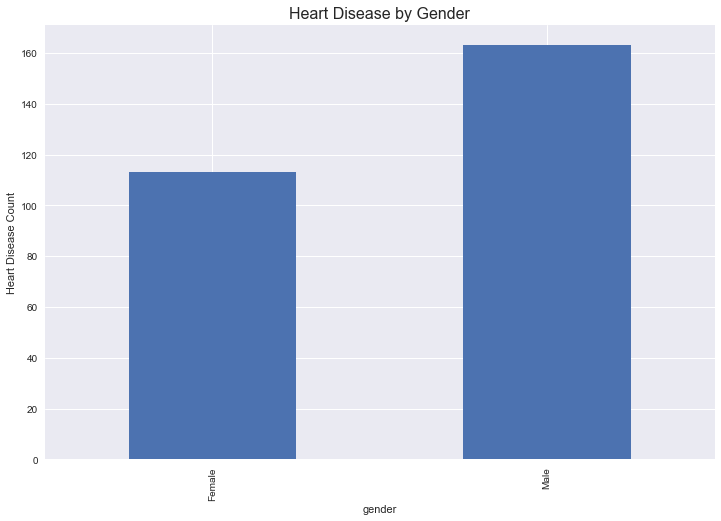

In [23]:
by_gender_sum.heart_disease.plot(kind='bar', figsize=(12,8))
plt.title("Heart Disease by Gender", fontsize=16)
plt.ylabel("Heart Disease Count")

Text(0, 0.5, 'BMI')

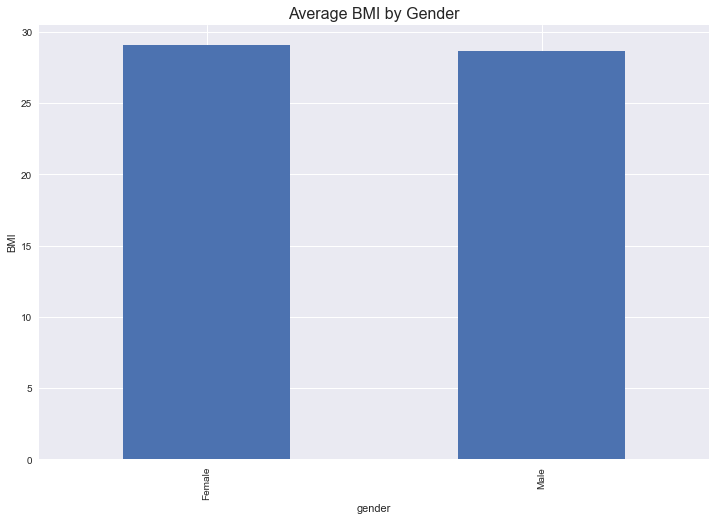

In [24]:
by_gender_mean.bmi.plot(kind='bar', figsize=(12,8))
plt.title("Average BMI by Gender", fontsize=16)
plt.ylabel('BMI')

## Group by Marriage

In [25]:
married = df.groupby('ever_married').sum()

In [26]:
married.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,63402596,38653.0,53,32,169316.07,44471.148319,29
Yes,123147356,182209.0,445,244,372955.23,103150.892300,220


Text(0, 0.5, 'Stroke Count')

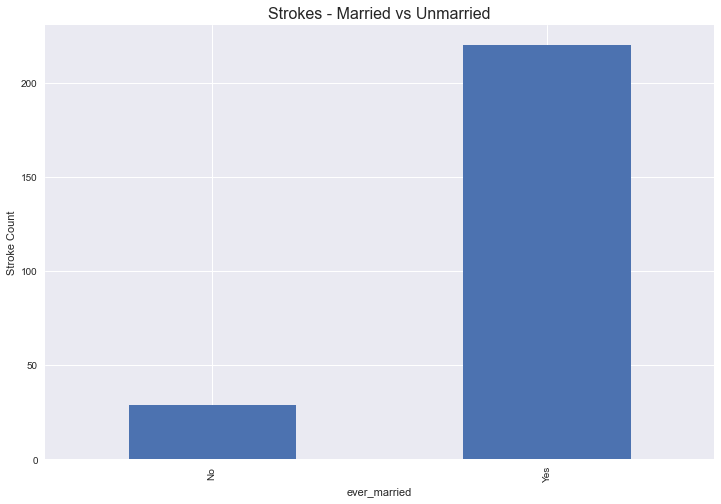

In [27]:
married.stroke.plot(kind='bar', figsize=(12,8))
plt.title("Strokes - Married vs Unmarried", fontsize=16)
plt.ylabel("Stroke Count")

Text(0.5, 1.0, 'Strokes in Men and Women by Marital Status')

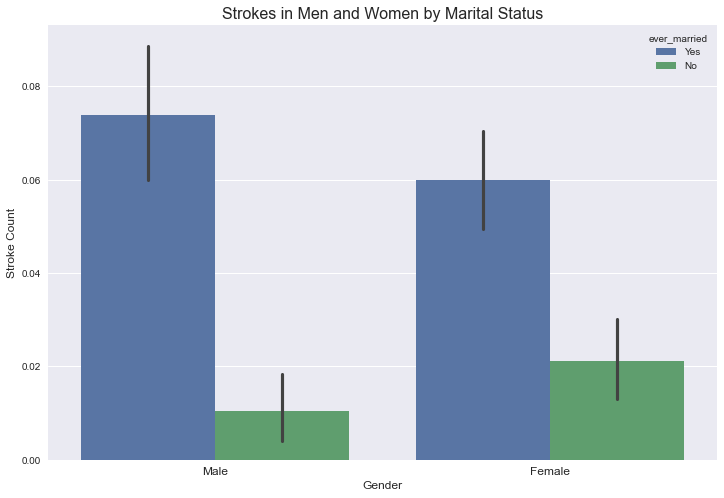

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x='gender', y='stroke', data=df, hue='ever_married')
plt.xticks(ticks=[0,1], labels=['Male', 'Female'], fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Stroke Count', fontsize=12)
plt.title('Strokes in Men and Women by Marital Status', fontsize=16)

# By Work Type:

In [29]:
by_work_sum = df.groupby('work_type').sum()

Text(0, 0.5, 'Stroke Count')

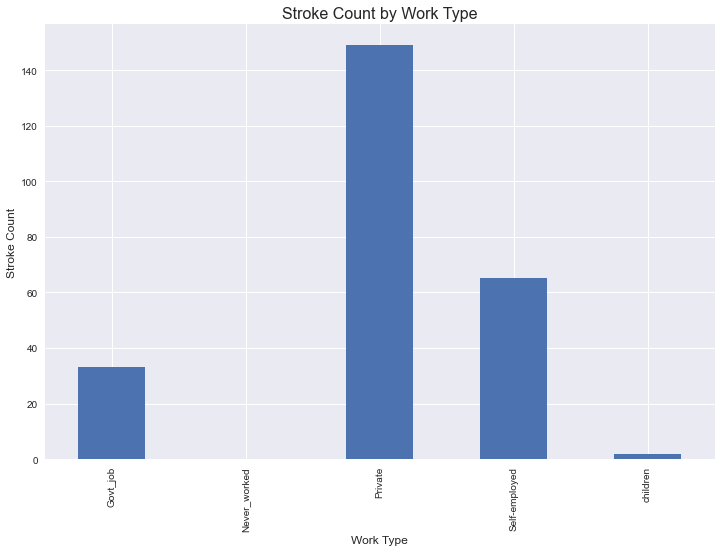

In [30]:
by_work_sum.stroke.plot(kind='bar', figsize=(12,8))
plt.title('Stroke Count by Work Type', fontsize=16)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Stroke Count', fontsize=12)

Text(0.5, 1.0, 'Strokes by Work Type')

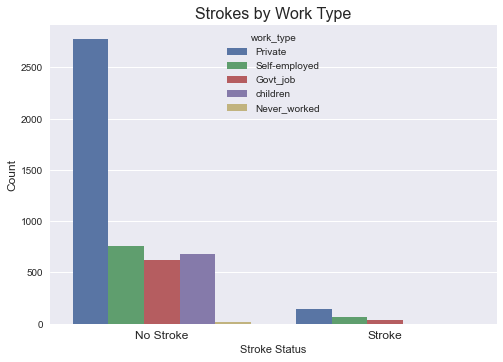

In [31]:
sns.countplot(x='stroke', data=df, hue='work_type')
plt.xticks(ticks=[0,1], labels=['No Stroke', 'Stroke'], fontsize=12)
plt.xlabel('Stroke Status')
plt.ylabel('Count', fontsize=12)
plt.title('Strokes by Work Type', fontsize=16)

Text(0.5, 1.0, 'Heart Disease by Work Type')

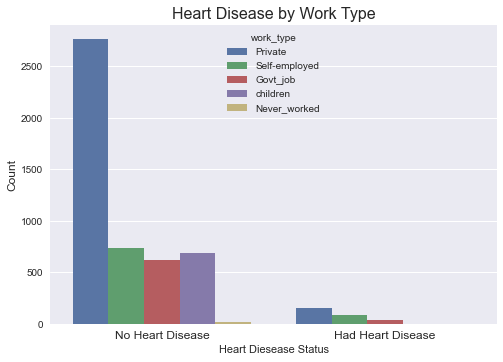

In [32]:
sns.countplot(x='heart_disease', data=df, hue='work_type')
plt.xticks(ticks=[0,1], labels=['No Heart Disease', 'Had Heart Disease'], fontsize=12)
plt.xlabel('Heart Diesease Status')
plt.ylabel('Count', fontsize=12)
plt.title('Heart Disease by Work Type', fontsize=16)

Private leads the count in both strokes and heart disease

## By Location (Urban/Rural)

In [33]:
area_sum = df.groupby('Residence_type').sum()

Text(0, 0.5, 'Stroke Count')

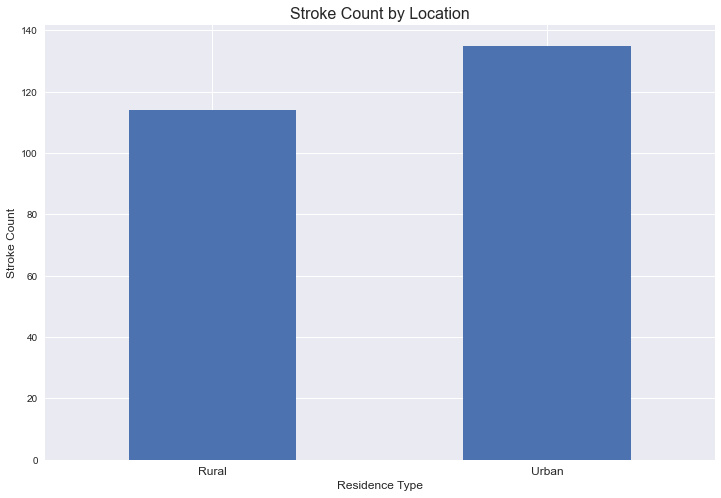

In [34]:
area_sum['stroke'].plot(kind='bar', figsize=(12,8))
plt.title("Stroke Count by Location", fontsize=16)
plt.xticks(ticks=[0,1], labels=['Rural', 'Urban'], rotation=0, fontsize=12)
plt.xlabel("Residence Type", fontsize=12)
plt.ylabel("Stroke Count", fontsize=12)

# By Smoking Status:

Text(0.5, 0, 'Smoking Status')

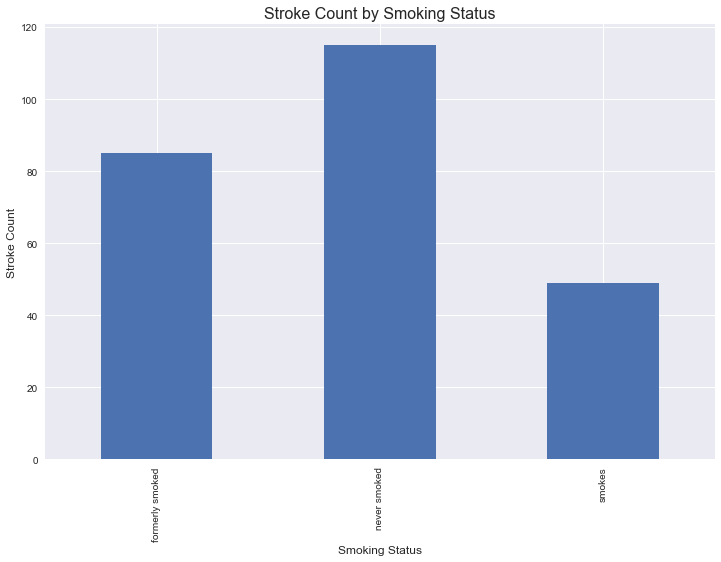

In [35]:
df.groupby('smoking_status').sum()['stroke'].plot(kind='bar', figsize=(12,8))
plt.title("Stroke Count by Smoking Status", fontsize=16)
plt.ylabel("Stroke Count", fontsize=12)
plt.xlabel("Smoking Status", fontsize=12)

Interesting, it almost appears that people who don't smoke have more strokes - but that doesn't imply any type of causality.

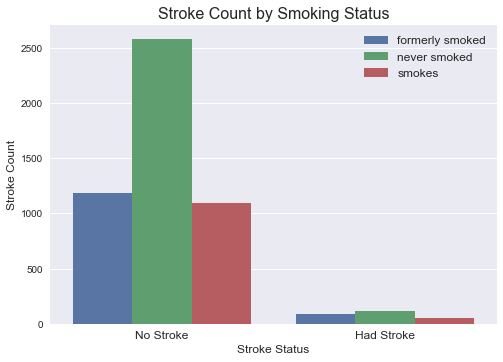

In [36]:
sns.countplot(x='stroke', data=df, hue='smoking_status')
plt.title("Stroke Count by Smoking Status", fontsize=16)
plt.xticks(ticks=[0,1], labels=['No Stroke', 'Had Stroke'], fontsize=12)
plt.ylabel("Stroke Count", fontsize=12)
plt.xlabel("Stroke Status", fontsize=12)
plt.legend(fontsize=12)

# Other EDA and correlations:

<AxesSubplot:>

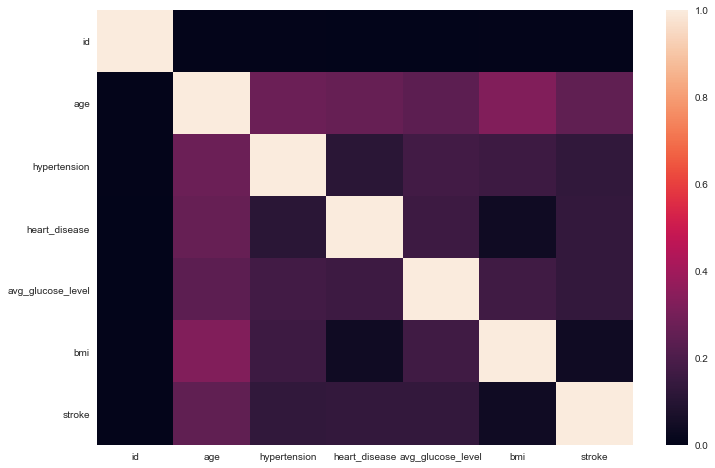

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

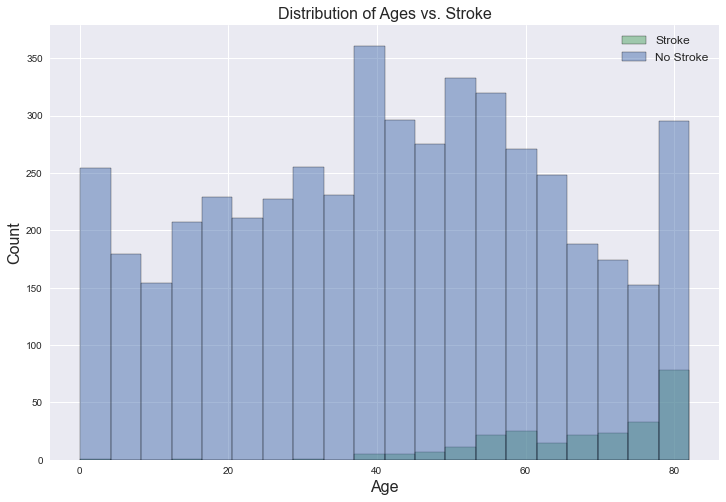

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(x='age', data=df, hue='stroke')
plt.title("Distribution of Ages vs. Stroke", fontsize=16)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(labels=['Stroke', 'No Stroke'], fontsize=12)

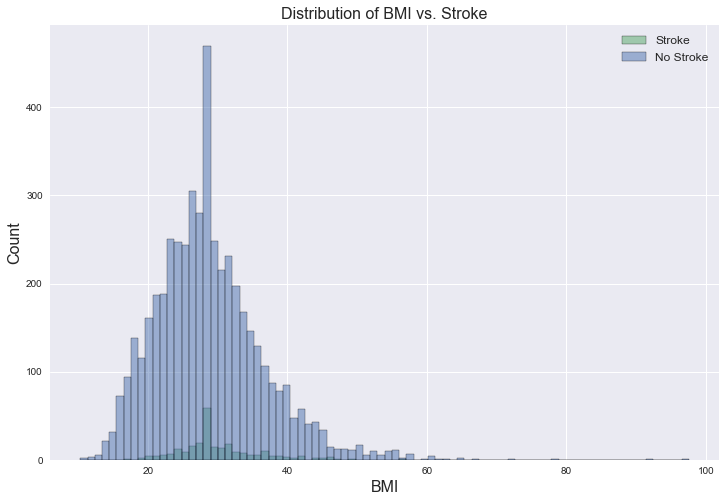

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(x='bmi', data=df, hue='stroke')
plt.title("Distribution of BMI vs. Stroke", fontsize=16)
plt.xlabel("BMI", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(labels=['Stroke', 'No Stroke'], fontsize=12)

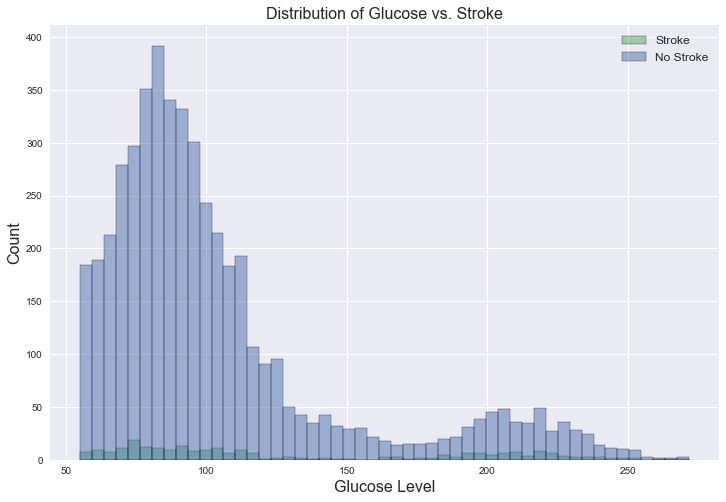

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(x='avg_glucose_level', data=df, hue='stroke')
plt.title("Distribution of Glucose vs. Stroke", fontsize=16)
plt.xlabel("Glucose Level", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(labels=['Stroke', 'No Stroke'], fontsize=12)

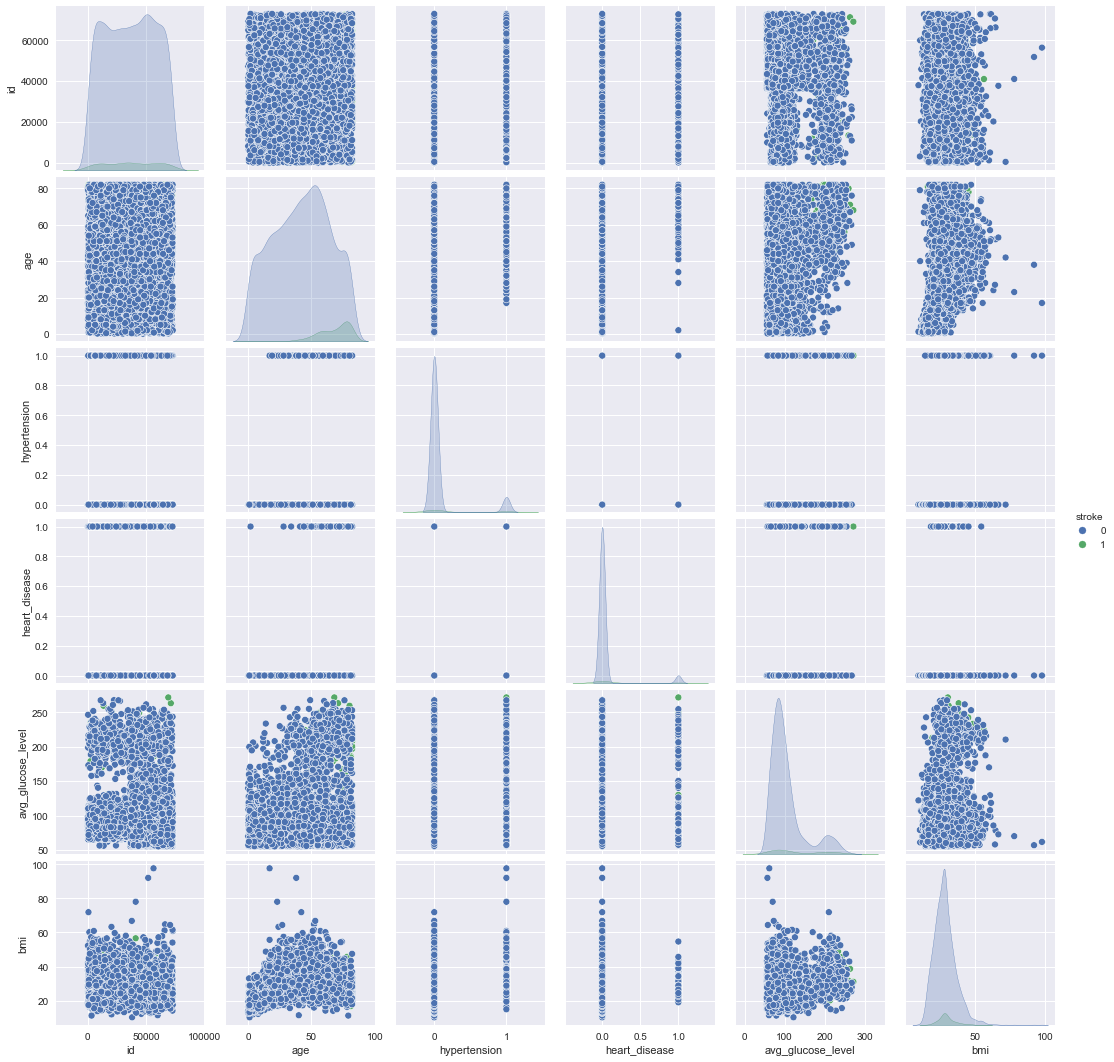

In [41]:
sns.pairplot(df, hue='stroke')

# Modeling

### Preprocessing

In [42]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [43]:
df.drop('id', axis=1, inplace=True)

In [44]:
final_df = pd.get_dummies(df, drop_first=True)

In [45]:
final_df.tail()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
5105,80.0,1,0,83.75,28.893237,0,0,1,0,1,0,0,1,1,0
5106,81.0,0,0,125.20,40.000000,0,0,1,0,0,1,0,1,1,0
5107,35.0,0,0,82.99,30.600000,0,0,1,0,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,1,0,1,0,0,0,0,0
5109,44.0,0,0,85.28,26.200000,0,0,1,0,0,0,0,1,0,0


In [46]:
final_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,1,0


In [47]:
5109-300

4809

In [48]:
extra_test = final_df.iloc[4809:5109]

In [49]:
extra_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
4810,53.0,0,0,142.64,27.800000,0,1,1,0,1,0,0,1,0,1
4811,61.0,0,0,69.77,29.900000,0,0,1,0,0,1,0,0,1,0
4812,45.0,0,0,71.40,28.400000,0,0,1,0,1,0,0,1,0,1
4813,17.0,0,0,79.61,24.100000,0,0,0,0,1,0,0,1,0,0
4814,17.0,0,0,77.46,24.000000,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0,1,0,1,0,0,1,1,0
5106,81.0,0,0,125.20,40.000000,0,0,1,0,0,1,0,1,1,0
5107,35.0,0,0,82.99,30.600000,0,0,1,0,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,1,0,1,0,0,0,0,0


In [50]:
drop = range(4809, 5110)

In [51]:
for i in drop:
    final_df.drop(index=i, inplace=True)

In [52]:
len(final_df)

4808

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = final_df.drop('stroke', axis=1)
y = final_df.stroke

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, accuracy_score, plot_roc_curve, f1_score

In [60]:
xgb = XGBClassifier(use_label_encoder=False)

In [61]:
xgb.fit(X_train, y_train)

[08:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [62]:
predictions = xgb.predict(X_test)

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1359
           1       0.38      0.07      0.12        84

    accuracy                           0.94      1443
   macro avg       0.66      0.53      0.54      1443
weighted avg       0.91      0.94      0.92      1443



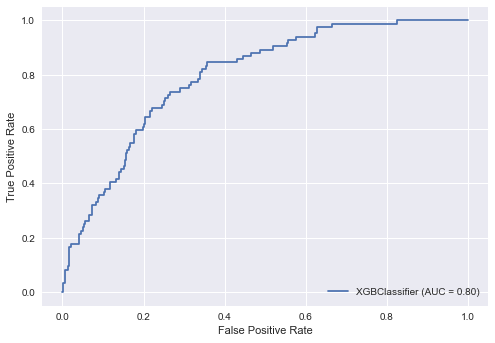

In [64]:
plot_roc_curve(xgb, X_test, y_test)

In [65]:
extra_X_test = extra_test.drop('stroke', axis=1)
extra_y_test = extra_test.stroke
extra_X_test = scaler.transform(extra_X_test)

In [66]:
pred = xgb.predict(extra_X_test)
print(classification_report(extra_y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       0.00      0.00      0.00         0

    accuracy                           1.00       300
   macro avg       0.50      0.50      0.50       300
weighted avg       1.00      1.00      1.00       300



C:\Users\adrie\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
def extra_test(est):
    pred = est.predict(extra_X_test)
    print("Extra Test Set Score is {}%".format(accuracy_score(extra_y_test, pred)))

In [68]:
extra_test(xgb)

Extra Test Set Score is 0.9966666666666667%


There is a clear problem with overfitting to no stroke. This makes a lot of sense, the data is pretty unbalanced.

I will return the original data to smooth some of this out

I am going to drop children, as all but two children have had strokes, so they contribute to a portion of the dataset that is not helping our model.

In [69]:
no_children = df[~(df.work_type == 'children')]

In [70]:
no_children.stroke.value_counts()

0    4175
1     247
Name: stroke, dtype: int64

After dropping children, we will get our dummy variables and use SMOTE to try to balance the classes

In [71]:
no_children = pd.get_dummies(no_children, drop_first=True)

In [72]:
X = no_children.drop('stroke', axis=1)
y = no_children.stroke

In [73]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [74]:
print(X.shape)
print(y.shape)

(4422, 13)
(4422,)


In [75]:
over = SMOTE(sampling_strategy=.4)
under = RandomUnderSampler(sampling_strategy='majority')

pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [76]:
X, y = pipeline.fit_resample(X, y)

In [77]:
print(X.shape)
print(y.shape)

(3340, 13)
(3340,)


In [78]:
y.value_counts()

1    1670
0    1670
Name: stroke, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
xgb2 = XGBClassifier(use_label_encoder=False)

In [81]:
xgb2.fit(X_train, y_train)

[08:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [82]:
pred = xgb2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       524
           1       0.85      0.91      0.88       478

    accuracy                           0.88      1002
   macro avg       0.88      0.88      0.88      1002
weighted avg       0.88      0.88      0.88      1002



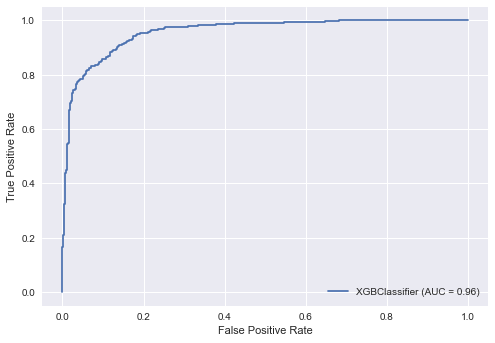

In [83]:
plot_roc_curve(xgb2, X_test, y_test)

This is a much better result, given that it's actually taking into account strokes vs. no strokes.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

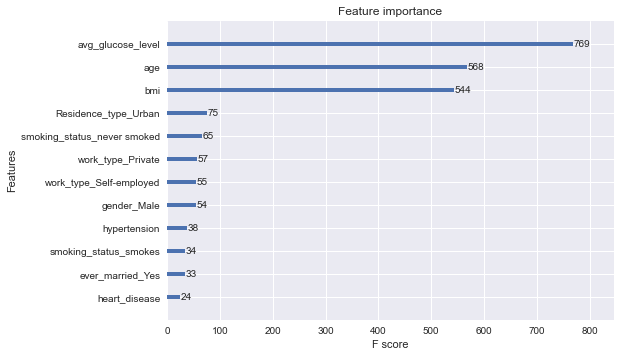

In [84]:
plot_importance(xgb2)

It's clear that Average glucose levels, BMI, and Age are the main predictors of a stroke.

## Hyperparameter Tuning:

In [85]:
from scipy import stats

In [86]:
param_dist = {'n_estimators': stats.randint(10, 1000),
              'learning_rate': stats.uniform(0.01, 0.9),
              'subsample': stats.uniform(0.1, 0.9),
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'colsample_bytree': stats.uniform(0.1, 0.9),
              'min_child_weight': [1, 2, 3, 4, 5, 6, 7]
             }

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
xgb_tuned = XGBClassifier(use_label_encoder=False)

In [89]:
cv = RandomizedSearchCV(xgb_tuned, param_distributions=param_dist, n_jobs=-1, n_iter=100, scoring='roc_auc', cv=10, random_state=42, verbose=1)

In [90]:
cv.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  5.1min finished


[08:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000144271345B0>,
                                        'max_dep

In [91]:
print(cv.best_score_ * 100) # Measured by ROC_AUC
print(cv.best_params_)

95.61679908424085
{'colsample_bytree': 0.7196499106888298, 'learning_rate': 0.06237423595759925, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 760, 'subsample': 0.3252186083481358}


# Final Model, as of 3/10/2021

In [92]:
xgb_final = XGBClassifier(colsample_bytree=0.7196499106888298, learning_rate = 0.06237423595759925,
                         max_depth = 11, min_child_weight = 1,
                         n_estimators = 760, subsample=0.3252186083481358)

In [93]:
xgb_final.fit(X_train, y_train)
pred = xgb_final.predict(X_test)

[08:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\adrie\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# Results

Model Accuracy:  88.42 %
Model F1 Score:  88.26 %


              precision    recall  f1-score   support

           0       0.91      0.86      0.89       524
           1       0.85      0.91      0.88       478

    accuracy                           0.88      1002
   macro avg       0.88      0.89      0.88      1002
weighted avg       0.89      0.88      0.88      1002



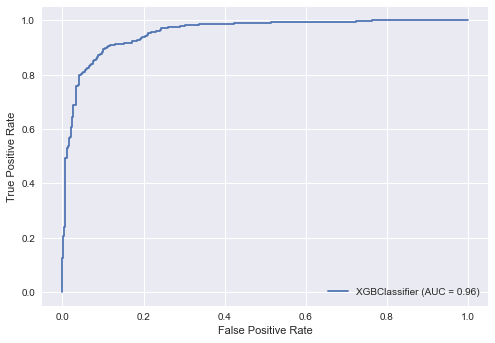

In [94]:
print("Model Accuracy: ", round(accuracy_score(y_test, pred) * 100, 2), "%")
print("Model F1 Score: ", round(f1_score(y_test, pred) * 100, 2), "%")
print("\n")
print(classification_report(y_test, pred))
plot_roc_curve(xgb_final, X_test, y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

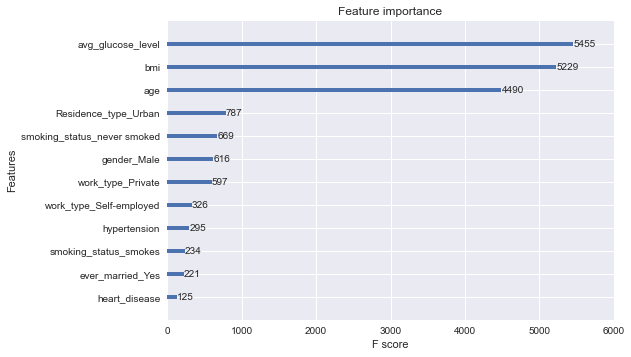

In [95]:
plot_importance(xgb_final)

## Conclusion:

1. BMI, Average Glucose Levels and Age have remained the 3 top important factors in our model predicting accurately.

2. The feature importance that follows makes sense based on our EDA - We saw that people who never smoked actually have a higher rate of strokes (though that does not imply causality), and that Males, people in urban areas, and people who work in the private sector have higher rates of stroke over their counterparts. 